Perform Exploratory Data Analysis (EDA) analysis on the following:
    Data Summarization:
        Descriptive Statistics: Calculate the variability for numerical features such as TotalPremium, TotalClaim, etc.
        Data Structure: Review the dtype of each column to confirm if categorical variables, dates, etc. are properly formatted.
    Data Quality Assessment:
        Check for missing values.
    Univariate Analysis:
        Distribution of Variables: Plot histograms for numerical columns and bar charts for categorical columns to understand distributions..
    Bivariate or Multivariate Analysis:
        Correlations and Associations: Explore relationships between the monthly changes TotalPremium and TotalClaims as a function of ZipCode, using scatter plots and correlation matrices.
    Data Comparison
        Trends Over Geography: Compare the change in insurance cover type, premium, auto make, etc. 
    Outlier Detection:
        Use box plots to detect outliers in numerical data
    Visualization
        Produce 3 creative and beautiful plots that capture the key insight you gained from your EDA


In [1]:
import os
os.chdir("../")


The data was changed to data/dataset.csv

In [ ]:
import pandas as pd
df = pd.read_csv('data/dataset.csv')

In [ ]:
df.info()

In [ ]:
# df['Date_Column'] = pd.to_datetime(df['Date_Column'])

Descriptive Statistics: Calculate the variability for numerical features such as TotalPremium, TotalClaim, etc.


Check for missing values.


In [ ]:
print(df.columns)

In [12]:
from scripts.preprocessing import count_missing_values

missing , missing_percent =count_missing_values(df)

In [ ]:
print(missing_percent)

most of the columns are compleat but some have missing values :
    NumberOfVehiclesInFleet     100.000000
    CrossBorder                  99.930207
    CustomValueEstimate          77.956560
    Converted                    64.183810
    Rebuilt                      64.183810
    WrittenOff                   64.183810
    NewVehicle                   15.327998
    Bank                         14.594670
    AccountType                   4.022806

data preprocessing 
    i have drop the columns :
        NumberOfVehiclesInFleet(becouse it have no data 100 percent missing)
        CrossBorder(becouse it have more than 99 percent missing value )

    and replace missing valuse for the remaining columns 
        numerica colums by mean 
        catagorical colums by mode
    


In [13]:
df = df.drop(columns=['NumberOfVehiclesInFleet','CrossBorder' ])

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64'])
categorical_cols = df.select_dtypes(include='object')
print("Numerical columns:", numerical_cols.columns)

print("Categorical columns:", categorical_cols.columns)

In [15]:
from scripts.preprocessing import replace_missing_with_mean, replace_missing_with_mode

df = replace_missing_with_mode(df,categorical_cols)
df = replace_missing_with_mean(df,numerical_cols.columns)

In [ ]:
missing, missing_percent = count_missing_values(df)
print(missing_percent)

In [ ]:
df.describe()

In [17]:
from scripts.eda import descriptive_statistics
#coumns to perform descriptive statistics 
columns_num = ['TotalPremium', 'TotalClaims','SumInsured', 'CalculatedPremiumPerTerm', 'ExcessSelected']


descriptive_result = descriptive_statistics(df, columns_num)


In [ ]:
from scripts.eda import visualize_descriptive_statistics
stats = descriptive_statistics(df, descriptive_result)
visualize_descriptive_statistics(stats)

Data Structure: Review the dtype of each column to confirm if categorical variables, dates, etc. are properly formatted.


In [ ]:
df.info()

we have object, float64, and int64 data types 

In [ ]:
object_cols = df.select_dtypes(include='object')
print(object_cols.columns)

Distribution of Variables: Plot histograms for numerical columns and bar charts for categorical columns to understand distributions..

In [ ]:
from scripts.eda import show_histograms
show_histograms(df, numerical_cols)

In [ ]:
from scripts.eda import show_bar_chart
show_bar_chart(df,categorical_cols)

Correlations and Associations: Explore relationships between the monthly changes TotalPremium and TotalClaims as a function of ZipCode, using scatter plots and correlation matrices.

In [20]:
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], format='ISO8601')


# Sort by TransactionMonth
df = df.sort_values('TransactionMonth')

# Calculate monthly changes
df['TotalPremium_Change'] = df['TotalPremium'].diff()
df['TotalClaims_Change'] = df['TotalClaims'].diff()

In [ ]:
from scripts.eda import corr_trotalpremium_totalclaim_postalcode

corr_trotalpremium_totalclaim_postalcode(df)

Data Comparison
    Trends Over Geography: Compare the change in insurance cover type, premium, auto make, etc. 


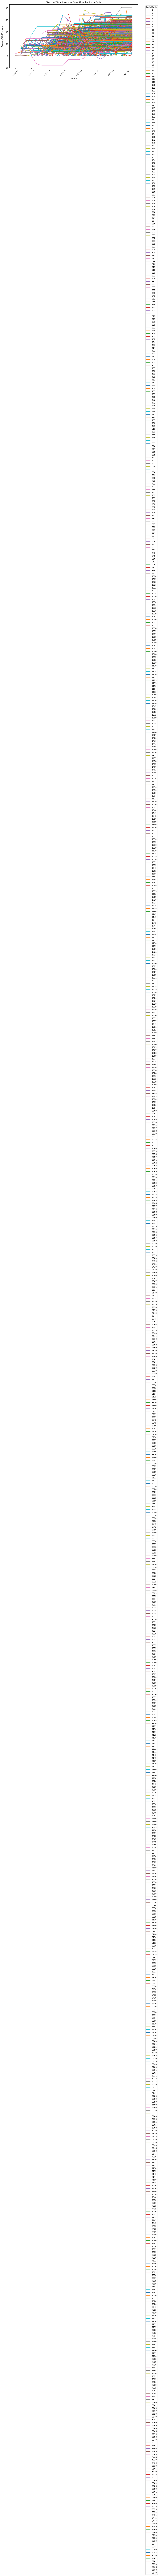

c:\Users\windows 10\Desktop\Insurance_Analatics\Insurance_Analytics\scripts\eda.py:88: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


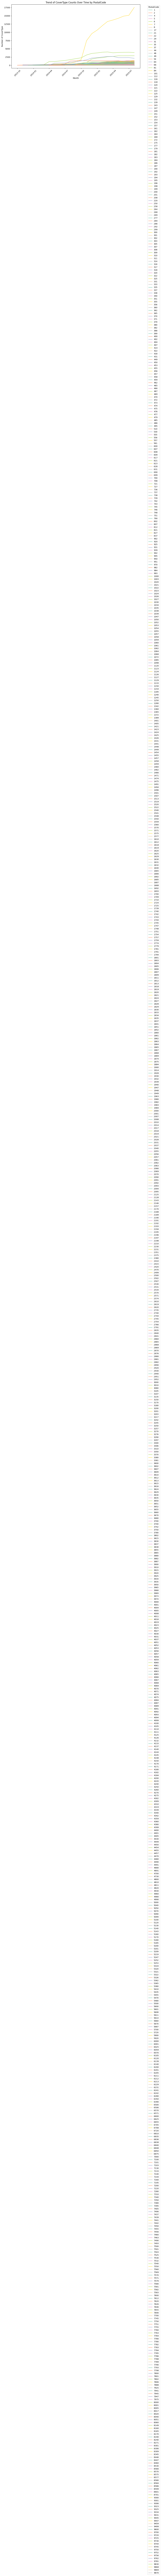

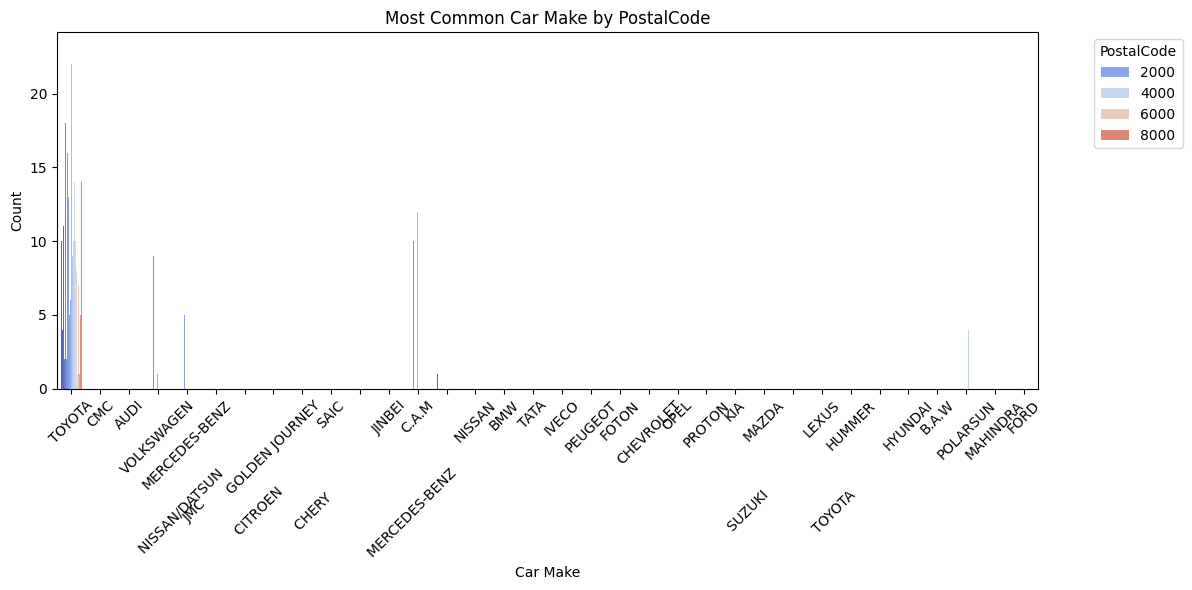

In [22]:
from scripts.eda import analyze_geographic_trends
analyze_geographic_trends(df)

Outlier Detection:
    Use box plots to detect outliers in numerical data

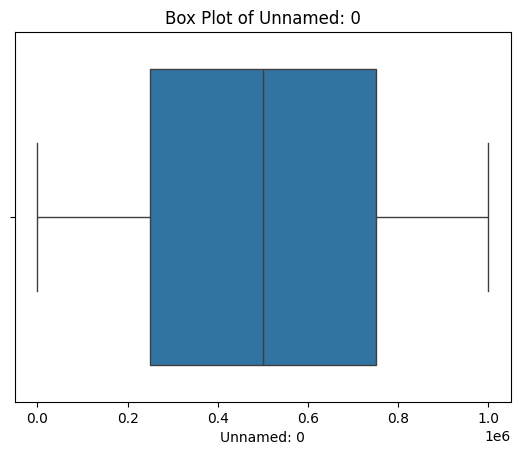

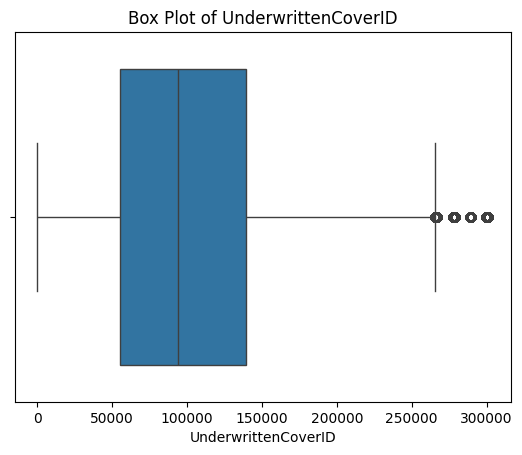

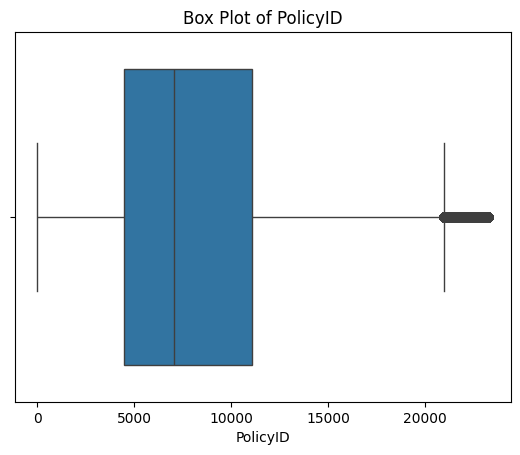

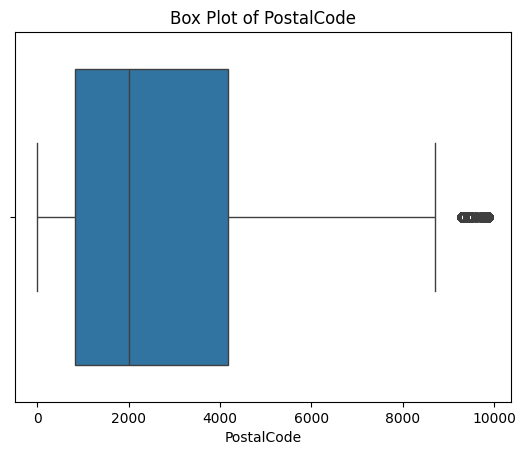

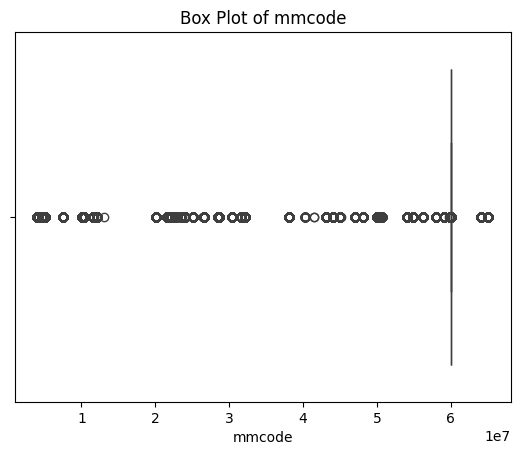

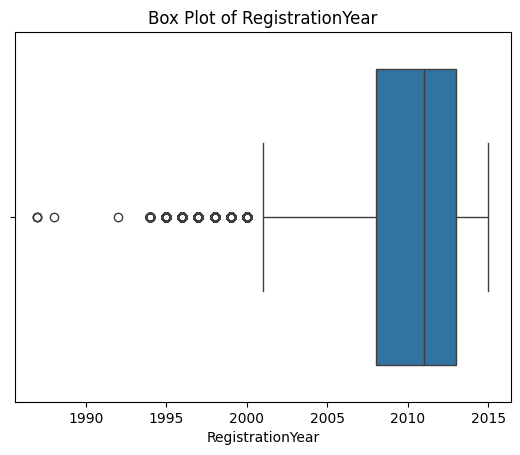

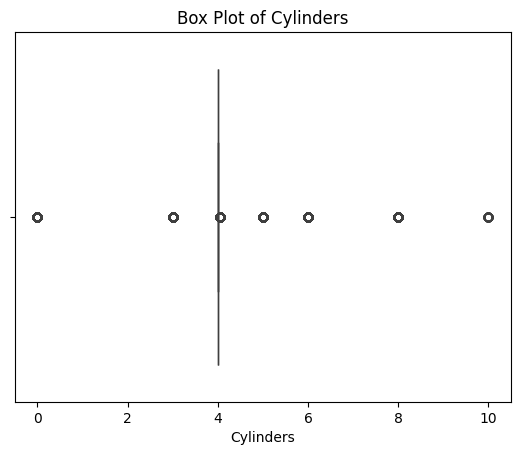

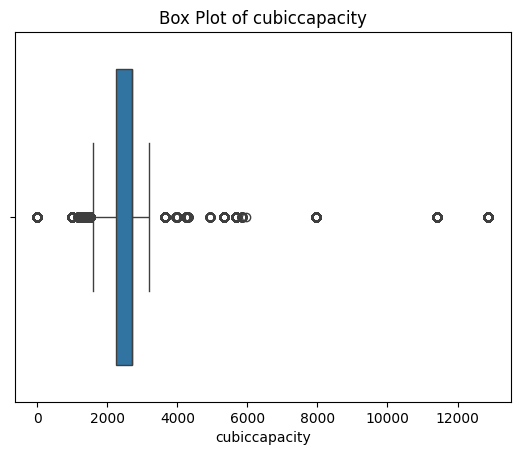

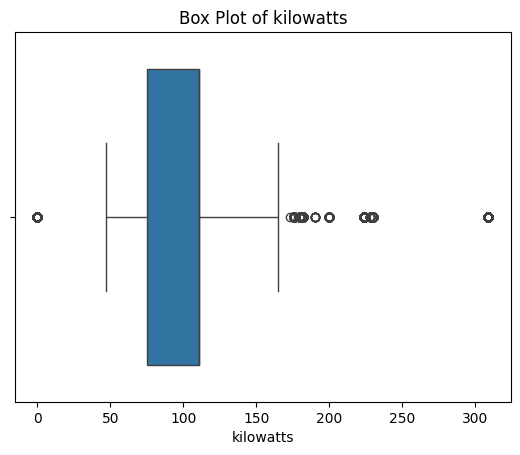

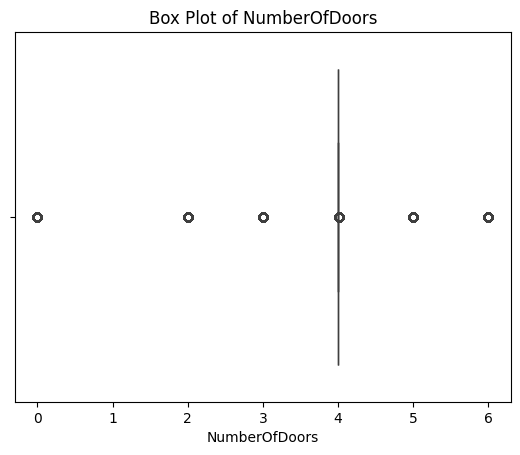

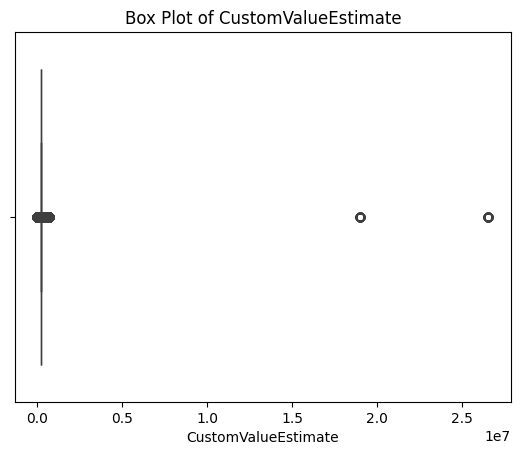

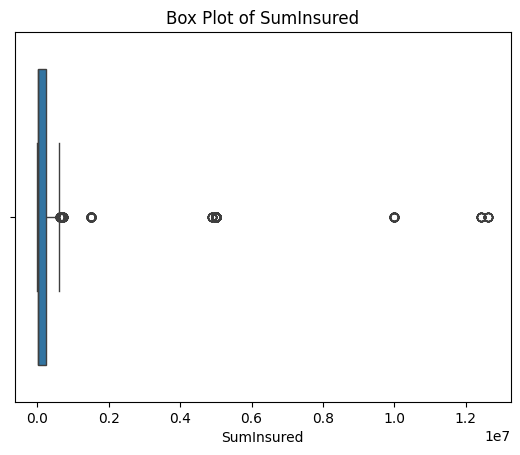

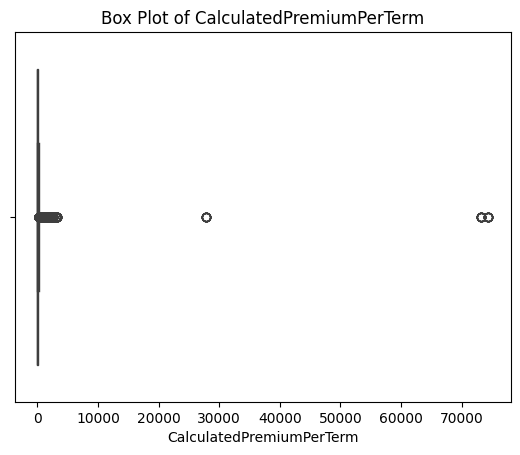

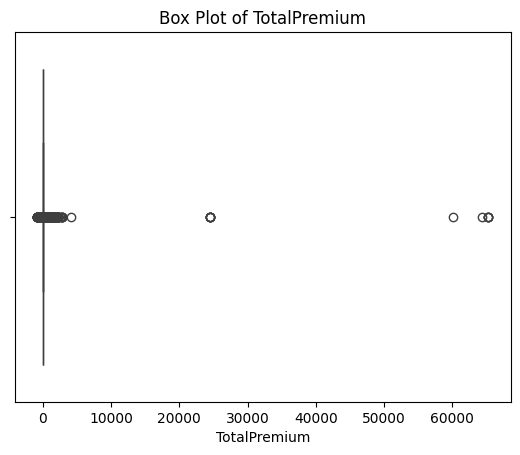

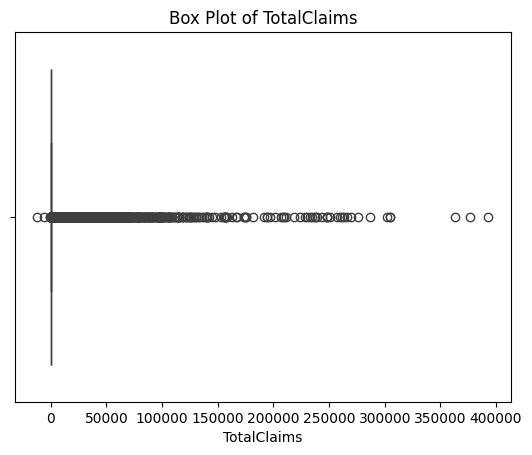

In [23]:
from scripts.eda import outlier_detection

outlier_detection(df, numerical_cols)

Visualization
    Produce 3 creative and beautiful plots that capture the key insight you gained from your EDA


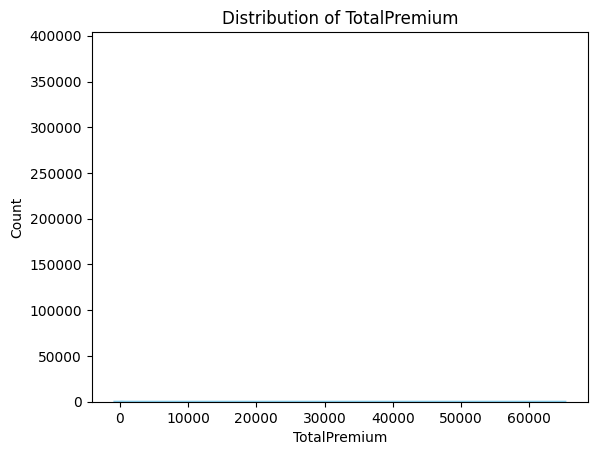

c:\Users\windows 10\Desktop\Insurance_Analatics\Insurance_Analytics\scripts\eda.py:156: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='CoverType', y='TotalPremium', data=df, palette='viridis', ci='sd')
c:\Users\windows 10\Desktop\Insurance_Analatics\Insurance_Analytics\scripts\eda.py:156: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CoverType', y='TotalPremium', data=df, palette='viridis', ci='sd')


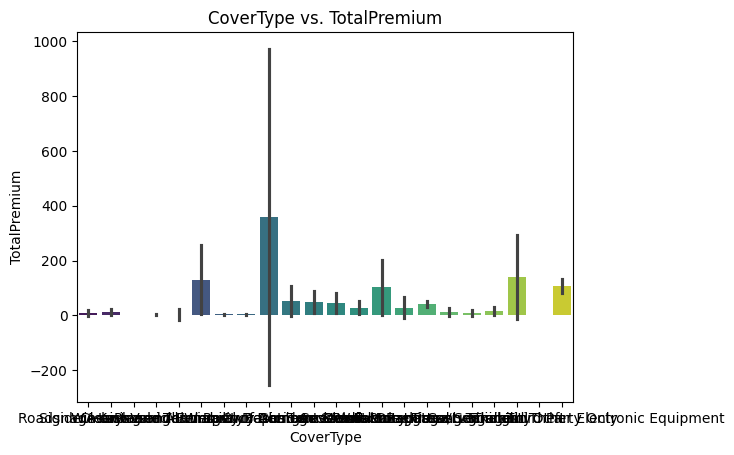

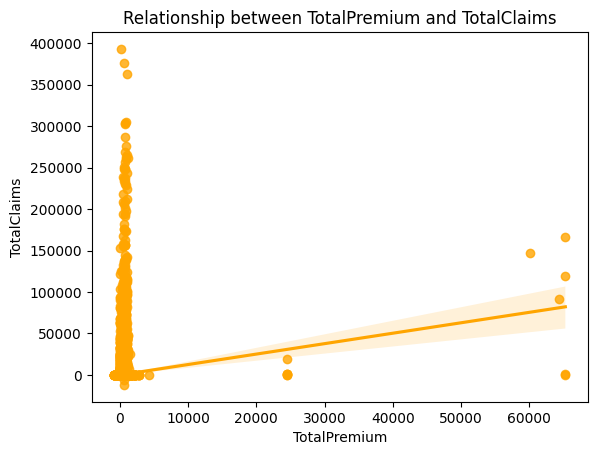

In [24]:
42
1?Kbmjv-
from scripts.eda import visualize_plots


visualize_plots(df)
